Importing the required Modules

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [143]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


Cleaning the data from the dataset

In [144]:
df = df[["Country", "EdLevel", "YearsCodePro" , "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly" : "Salary"},axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN


In [145]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38071 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   EdLevel       38054 non-null  object 
 2   YearsCodePro  37935 non-null  object 
 3   Employment    38067 non-null  object 
 4   Salary        38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [147]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [148]:
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31382 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Salary        31382 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [149]:
df['Country'].value_counts()

United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
                                                        ... 
Haiti                                                      1
Zambia                                                     1
Suriname                                                   1
Somalia                                                    1
Seychelles                                                 1
Name: Country, Length: 155, dtype: int64

In [150]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = "Other"
    return categorical_map

In [151]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df["Country"].map(country_map)
df.Country.value_counts()

Other                                                   8643
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Russian Federation                                       425
Switzerland                                              416
Name: Country, dtype: in

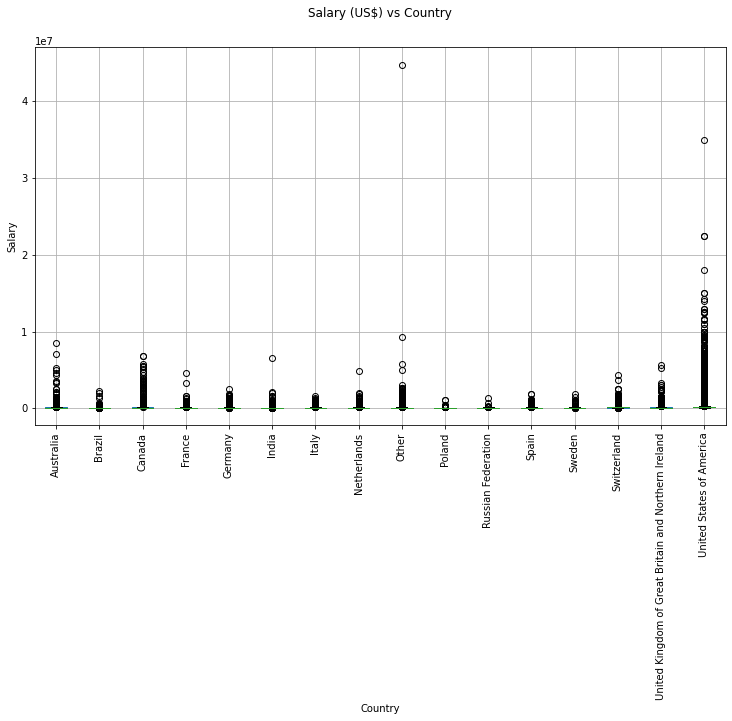

In [152]:
fig, ax = plt.subplots(1,1,figsize = (12,7))
df.boxplot("Salary","Country",ax=ax)
plt.suptitle("Salary (US$) vs Country")
plt.title("")
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()


In [153]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df["Country"] != "Other"]

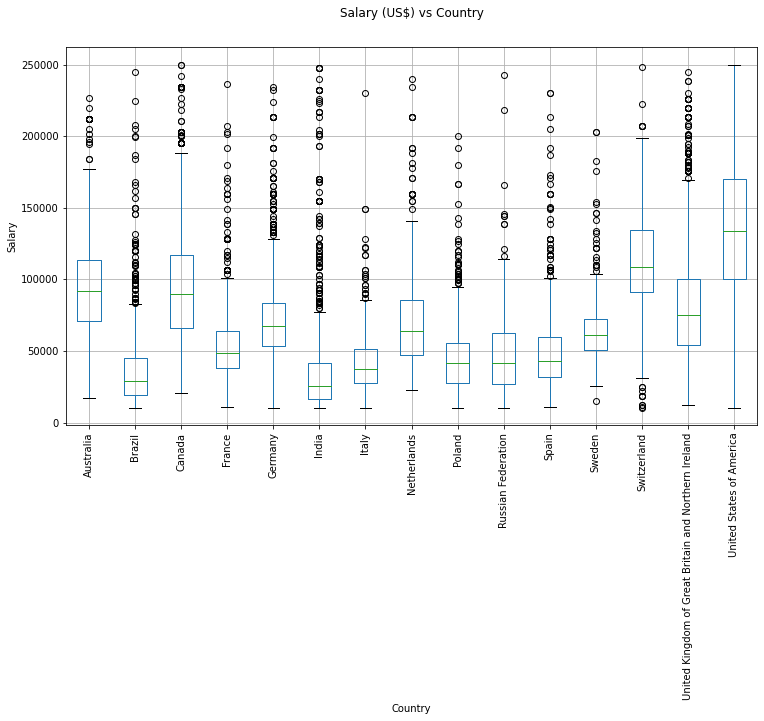

In [154]:
fig, ax = plt.subplots(1,1,figsize = (12,7))
df.boxplot("Salary","Country",ax=ax)
plt.suptitle("Salary (US$) vs Country")
plt.title("")
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()

In [155]:
df["YearsCodePro"] .unique()

array(['5', '6', '2', '4', '20', '9', '14', '21', '15', '25', '3', '10',
       '8', '12', '7', '19', '17', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '22', '32', '13', '27', '28',
       '16', '31', '34', '35', '26', '42', '38', '30', '36', '40', '41',
       '29', '33', '39', '48', '45', '44', '43', 'More than 50 years',
       '47', '49', '50'], dtype=object)

In [156]:
def clean_experience(x):
    if x == "More than 50 years":
        return 50
    if x == "Less than 1 year":
        return 0.5
    return float(x)
df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)

In [157]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Something else',
       'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [158]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [159]:
df["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [160]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df["EdLevel"] = le_education.fit_transform(df["EdLevel"])
df["EdLevel"].unique()

array([2, 0, 1, 3])

In [161]:
le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([13,  7, 14,  6,  2,  4,  8,  3,  1, 11, 10,  5, 12,  0,  9])

In [162]:
X = df.drop("Salary" , axis=1)
Y = df["Salary"]

In [163]:
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression()
linearreg.fit(X,Y.values)

LinearRegression()

In [164]:
Y_pred = linearreg.predict(X)

In [165]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
error = np.sqrt(mean_squared_error(Y, Y_pred))

In [166]:
error

44689.67485721425

In [167]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, Y.values)

DecisionTreeRegressor(random_state=0)

In [168]:
y_pred = dec_tree_reg.predict(X)

In [169]:
error = np.sqrt(mean_squared_error(Y, Y_pred))
print("${:,.02f}".format(error))

$44,689.67


In [170]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, Y.values)

RandomForestRegressor(random_state=0)

In [171]:
y_pred = random_forest_reg.predict(X)

In [172]:
error = np.sqrt(mean_squared_error(Y, Y_pred))
print("${:,.02f}".format(error))

$44,689.67


In [173]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, Y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [174]:
regressor = gs.best_estimator_

regressor.fit(X, Y.values)
Y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(Y, Y_pred))
print("${:,.02f}".format(error))

$34,864.27


In [175]:
X

,Country,EdLevel,YearsCodePro
2,13,2,5.0
8,7,2,6.0
10,13,0,2.0
12,14,0,5.0
21,6,2,4.0
...,...,...,...
73113,14,2,5.0
73116,14,0,16.0
73119,14,0,1.0
73120,10,0,2.0


In [176]:

X = np.array([["India", 'Master’s degree', 15 ]])
X

array([['India', 'Master’s degree', '15']], dtype='<U15')

In [177]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[ 5.,  2., 15.]])

In [178]:
Y_pred = regressor.predict(X)
Y_pred

c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([55051.73809524])

In [179]:
import pickle

In [181]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [182]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [183]:
y_pred = regressor_loaded.predict(X)
y_pred

c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([55051.73809524])